In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/bl2621/.conda/envs/ccwEnv/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from shapely.geometry import Polygon, Point

In [3]:
import shapely

In [4]:
import urllib

In [5]:
import os

In [6]:
from fiona.crs import from_epsg

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
import pykrige

In [9]:
import numpy as np

In [10]:
import sklearn

In [11]:
from pykrige.rk import Krige
from pykrige.compat import GridSearchCV
from pykrige.ok import OrdinaryKriging

## Down load the data 

In [12]:
url = 'https://data.cityofnewyork.us/api/views/i4gi-tjb9/rows.csv?accessType=DOWNLOAD'
pd.read_csv(url, usecols = ['ID', 'BOROUGH','DATA_AS_OF', 'SPEED','LINK_POINTS','TRAVEL_TIME']).to_csv('DOT_Traffic_Speeds_NBE.csv')

In [12]:
df = pd.read_csv('DOT_Traffic_Speeds_NBE.csv',usecols = ['ID', 'BOROUGH','DATA_AS_OF', 'SPEED','LINK_POINTS','TRAVEL_TIME'])

In [13]:
gdf = df.dropna()

In [14]:
def turn_format_latitude(m):
    lati = []
    for x in [i.split(',') for i in m.split(' ')]:
        if len(x) >= 2:
            try:
                lati.append(float(x[0]))
            except:
                pass
    return np.mean(lati)
            

In [15]:
def turn_format_longitude(m):
    longi = []
    for x in [i.split(',') for i in m.split(' ')]:
        if len(x) >= 2:
            try:
                longi.append(float(x[1]))
            except:
                pass
    return np.mean(longi)
            

In [16]:
gdf['longitude'] = gdf['LINK_POINTS'].apply(turn_format_longitude)

In [17]:
gdf['latitude'] = gdf['LINK_POINTS'].apply(turn_format_latitude)

In [18]:
gdf['lonlat'] = list(zip(gdf.longitude, gdf.latitude))
gdf['geometry'] = gdf[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

In [19]:
gdf = gpd.GeoDataFrame(gdf)

In [20]:
def less_than_70(x):
    return x < -70

In [21]:
gdf = gdf[gdf['longitude'].apply(less_than_70)]

In [22]:
# gdf.crs = from_epsg(4326)
# gdf.to_crs(epsg=2263, inplace = True)

In [72]:
# url = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
# urllib.request.urlretrieve(url, "file.gz")
# !unzip file.gz

In [23]:
ct = gpd.GeoDataFrame.from_file("geo_export_45386e0f-466c-4969-9964-b525ce8221f9.shp")

In [24]:
# ct.to_crs(epsg=2263, inplace=True)

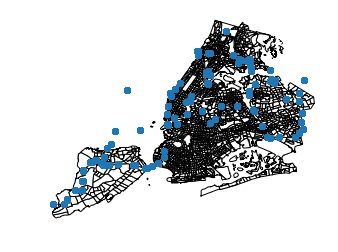

In [25]:
ax = ct.plot(facecolor = 'w', edgecolor = 'k')
gdf.plot(ax = ax)
ax.axis('off')
plt.savefig('plot.png')

In [27]:
param_dict = {"method": ["ordinary", "universal"],
              "variogram_model": ["linear", "power", "gaussian", "spherical"],
#                 "nlags": [1, 2, 3],
#                "weight": [True, False]
              }

estimator = GridSearchCV(Krige(), param_dict, verbose=True)
# dummy data
lon = gdf.longitude
lat = gdf.latitude
z = gdf.SPEED

X = np.column_stack((lon, lat))

# run the gridsearch
estimator.fit(X=X, y=z)

if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)

print('\nCV results::')
if hasattr(estimator, 'cv_results_'):
    for key in ['mean_test_score', 'mean_train_score',
                'param_method', 'param_variogram_model']:
        print(' - {} : {}'.format(key, estimator.cv_results_[key]))



# OK = OrdinaryKriging(lon, lat, z, variogram_model='linear', verbose=False,
#                      enable_plotting=False, coordinates_type='geographic')

# z1, ss1 = OK.execute('grid', lon, lat)
# Create ordinary kriging object ignoring curvature:
# OK = OrdinaryKriging(lon, lat, z, variogram_model='linear', verbose=False,
#                      enable_plotting=False)
# Execute on grid:
# z2, ss2 = OK.execute('grid', lon, lat)


/nfshome/bl2621/.conda/envs/ccwEnv/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will 

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 41.3min finished
/nfshome/bl2621/.conda/envs/ccwEnv/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best_score R² = 0.815
best_params =  {'variogram_model': 'spherical', 'method': 'ordinary'}

CV results::
 - mean_test_score : [   0.81546603    0.81546603    0.81546603    0.81546603  -67.60376595
  -21.17498033 -132.7986728   -45.02378838]
 - mean_train_score : [   0.88067829    0.88067829    0.88067829    0.88067829  -66.53881201
  -20.48993977 -132.12011776  -44.36830954]
 - param_method : ['ordinary' 'ordinary' 'ordinary' 'ordinary' 'universal' 'universal'
 'universal' 'universal']
 - param_variogram_model : ['linear' 'power' 'gaussian' 'spherical' 'linear' 'power' 'gaussian'
 'spherical']


/nfshome/bl2621/.conda/envs/ccwEnv/lib/python3.5/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
